In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('GSE64881_segmentation_at_30000bp.passqc.multibam.txt', delimiter="\t")

In [65]:
df["chrom"].describe()

count     90877
unique       35
top        chr1
freq       6574
Name: chrom, dtype: object

In [66]:
df

,chrom,start,stop,F10A2,F10A3,F10A4,F10A5,F10A6,F10B1,F10B2,...,F9F2,F9F3,F9F4,F9F5,F9F6,F9G1,F9G2,F9G3,F9G4,F9G5
0,chr1,0,30000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr1,30000,60000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr1,60000,90000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr1,90000,120000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr1,120000,150000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90872,chr4_random,150000,160594,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90873,chr3_random,0,30000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90874,chr3_random,30000,41899,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90875,chrM,0,16299,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [61]:
df = df.drop(['chrom', 'start', 'stop'], axis=1)

In [52]:
df.columns

Index(['F10A2', 'F10A3', 'F10A4', 'F10A5', 'F10A6', 'F10B1', 'F10B2', 'F10B3',
       'F10B4', 'F10B5',
       ...
       'F9F2', 'F9F3', 'F9F4', 'F9F5', 'F9F6', 'F9G1', 'F9G2', 'F9G3', 'F9G4',
       'F9G5'],
      dtype='object', length=408)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90877 entries, 0 to 90876
Columns: 408 entries, F10A2 to F9G5
dtypes: int64(408)
memory usage: 282.9 MB


In [6]:
# number of rows (genomic windows) -> 90877
# number of cols (NPs) -> 408

In [7]:
df.sum().mean()

5482.811274509804

In [8]:
# avg number of windows in any NP -> 5483

In [9]:
df.sum().min()

31

In [10]:
#  min number of windows in any NP -> 31

In [11]:
df.sum().max()

21249

In [12]:
# max number of windows in any NP -> 21249

In [13]:
df.sum(axis=1).mean()

24.615546287839607

In [14]:
#avg number of NPs per windows-> 25

In [15]:
print(df.sum(axis=1).min())
print(df.sum(axis=1).max())

0
408


In [59]:
df

,F10A2,F10A3,F10A4,F10A5,F10A6,F10B1,F10B2,F10B3,F10B4,F10B5,...,F9F2,F9F3,F9F4,F9F5,F9F6,F9G1,F9G2,F9G3,F9G4,F9G5
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90875,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [19]:
df.sum().mean()

5482.811274509804

In [22]:
df.sum(axis=1).mean()

24.615546287839607

In [54]:
detection_freq_wind = df.sum()/(df.sum().max()-df.sum().min())

In [55]:
detection_freq_wind

F10A2    0.276982
F10A3    0.356584
F10A4    0.233198
F10A5    0.180554
F10A6    0.039401
           ...   
F9G1     0.111556
F9G2     0.167782
F9G3     0.161467
F9G4     0.095909
F9G5     0.266283
Length: 408, dtype: float64

<Axes: >

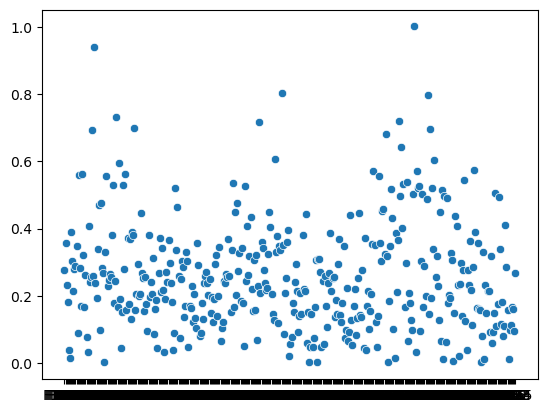

In [56]:
sns.scatterplot(detection_freq_wind)

In [57]:
detection_freq_np = df.sum(axis=1)/(df.sum(axis=1).max() - df.sum(axis=1).min())

<Axes: >

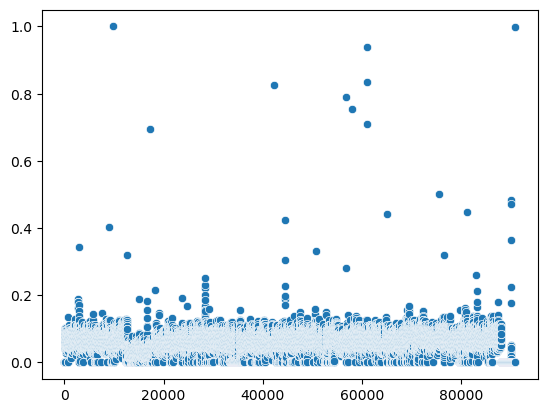

In [58]:
sns.scatterplot(detection_freq_np)